In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import matplotlib
from matplotlib import pyplot as plt

workdir = "path"

In [2]:
# < Important note > [ Please download input data from https://mega.nz/#F!CeYGDKyS!uqkmWJ4E2XSGJp_C2VO2gg]
# IC50evaluation//Dataset//Scenario5_EYDC-9K_znorm_minmax

dataset = np.load(workdir + "//191204_EMDC9K_z_norm_z_norm_minmax.npz") # input file
ss0 = np.load(workdir + '//191204_EMDC9K_z_norm_z_norm_minmax_r0.npz') # split for training and test

In [3]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [4]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# # In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [5]:
# In[15]:
ab =[]
for i in range(100,200):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

0 37


In [6]:
x.shape

(9590, 41505)

In [7]:
training_image_array.shape

(8631, 41505)

In [8]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [9]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8631, 41505) (8631,) (959, 41505) (959,)


In [10]:
train_X = np.nan_to_num(train_X)
test_X = np.nan_to_num(test_X)

In [11]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (8631, 41505)
8631 train samples
959 test samples


In [12]:
# https://towardsdatascience.com/how-to-perform-lasso-and-lasso-regression-in-python-3b3b75541ad8
# https://brunch.co.kr/@itschloe1/11
StartTime8 = datetime.now()
print("StartTime :", StartTime8)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso_regressor = Lasso(alpha=0.001)

lasso_regressor.fit(train_X,train_y)

EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2019-12-10 13:53:28.707643


C:\Users\ylab\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


EndTime : 2019-12-10 13:54:55.913473


In [13]:
import matplotlib
from matplotlib import pyplot as plt

In [14]:
predicted_classes = lasso_regressor.predict(test_X)

In [15]:
predicted_value = predicted_classes

In [16]:
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]
workdir = "D://ResIC50_finalized_data//191205_rerun//ResNet//Result//EYDC-9K//Lasso"
c.to_csv(workdir + '//191205_EYDC_9K_znorm_znorm_minmax_Lasso_result.csv')


In [17]:
c

Predicted      Test
0     1.476399  2.079442
1     1.438011  2.079442
2    -0.504822 -1.595384
3     1.968500  2.079442
4    -1.220798 -3.566824
5     1.752885  2.079442
6    -1.284435 -0.294071
7     1.820684  2.079442
8     2.473268  2.039509
9     1.385144 -0.077654
10    1.028042 -1.390504
11    2.692816  2.079442
12    1.826683  2.035422
13    1.688497  2.079442
14   -2.480439 -1.436804
15    2.222932  2.079442
16    1.648436  1.019624
17   -3.997867 -4.561070
18    1.176119 -1.301971
19    1.735826  2.079442
20    2.140552  2.079442
21    1.601310  2.079442
22   -3.816257 -5.006347
23    1.721674  2.079442
24    2.441308  2.079442
25    2.116273  2.079442
26   -2.991629 -3.785315
27    1.032570  2.055531
28    0.941056  1.774149
29   -3.070923 -3.256286
..         ...       ...
929   0.898348 -0.334657
930   1.894833  2.079442
931  -2.757813 -4.362381
932   0.751023  1.013571
933   1.090799  2.079442
934   1.791568  2.079442
935   2.159876  2.079442
936  -3.866768 -3.618670
937   1.627983  2.079442
938   1.699467  2.079442
939   1.029958  2.079442
940   1.247941  2.079442
941   1.486456  1.479909
942   2.440723  2.079442
943   1.721238  2.079442
944   1.217008  0.470163
945   1.584774  2.079442
946   2.157234  2.079442
947   0.370078 -2.459193
948   2.558721  2.079442
949   2.108438  2.079442
950   2.204081  2.079442
951   1.443943  1.076232
952   1.924396  2.079442
953   0.267985  1.357675
954   0.739407 -1.024949
955  -3.439089 -2.884054
956   0.755262 -0.837603
957  -1.485388 -1.808728
958   0.753792  1.896654

[959 rows x 2 columns]

In [18]:
predicted_value.shape

(959,)

In [21]:
import pickle
from sklearn.externals import joblib
joblib.dump(lasso_regressor, workdir + '//191205_EYDC_9K_znorm_znorm_minmax_Lasso_model.pkl') 


['D://ResIC50_finalized_data//191205_rerun//ResNet//Result//EYDC-9K//Lasso//191205_EYDC_9K_znorm_znorm_minmax_Lasso_model.pkl']

In [22]:
clf_from_joblib = joblib.load(workdir + '//191205_EYDC_9K_znorm_znorm_minmax_Lasso_model.pkl') 
clf_from_joblib.predict(test_X)

array([ 1.4763988 ,  1.4380107 , -0.50482225,  1.9684998 , -1.220798  ,
        1.7528849 , -1.284435  ,  1.8206836 ,  2.4732676 ,  1.3851442 ,
        1.0280423 ,  2.6928158 ,  1.8266833 ,  1.688497  , -2.480439  ,
        2.2229323 ,  1.6484361 , -3.9978669 ,  1.176119  ,  1.735826  ,
        2.1405516 ,  1.6013103 , -3.8162572 ,  1.721674  ,  2.441308  ,
        2.1162734 , -2.991629  ,  1.0325704 ,  0.94105566, -3.070923  ,
        2.4294171 ,  0.803463  ,  1.9956734 ,  0.58191425,  2.1285024 ,
       -2.972346  ,  1.6965933 ,  1.6243644 ,  2.0410805 ,  1.2863185 ,
        2.070211  , -1.4055343 , -2.209683  ,  1.9741913 ,  1.0330861 ,
       -4.029558  ,  1.0180292 ,  2.2283287 ,  0.8840655 ,  2.2173824 ,
        0.16030318,  1.8667529 ,  1.2476242 ,  2.7618039 ,  0.53717405,
        1.3816257 ,  1.9333951 ,  0.86066926,  2.046113  ,  2.5084546 ,
        2.712787  ,  1.9412951 ,  2.188288  ,  1.8296719 , -2.3655138 ,
        2.1057508 ,  0.89765406,  1.9636008 ,  0.81646895,  1.72

In [23]:
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

0.7048768257002369


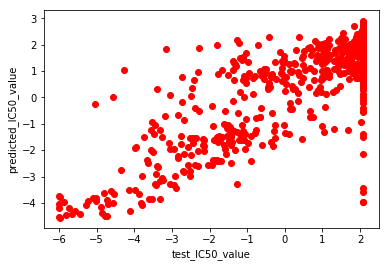

In [24]:
plt.scatter(test_label_array,predicted_value,c='red')
plt.xlabel('test_IC50_value')
plt.ylabel('predicted_IC50_value')
plt.savefig(workdir + '//191205_EYDC_9K_znorm_znorm_minmax_Lasso_scatter_plot.png')

In [25]:
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 1.0696648946446943


In [ ]:
# R-squared value

from sklearn.metrics import r2_score
r2_value = r2_score(b, a) 
print(r2_value)